# Import Library

In [2]:
import pandas as pd
import numpy as np

## Library visualisasi
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline 
# ga perlu plt.show()
matplotlib.style.use('ggplot') # tema visualisasi kayak di R

# Import Dataset

In [3]:
data = pd.read_csv('HR_comma_sep.csv')

# Quick Look

In [4]:
data.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,sales,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low


In [10]:
data_baru = data.rename(columns={'sales': 'division',})

In [12]:
data_baru

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,division,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low
...,...,...,...,...,...,...,...,...,...,...
14994,0.40,0.57,2,151,3,0,1,0,support,low
14995,0.37,0.48,2,160,3,0,1,0,support,low
14996,0.37,0.53,2,143,3,0,1,0,support,low
14997,0.11,0.96,6,280,4,0,1,0,support,low


# Descriptive Statistics

#### Measure of Tendency

In [14]:
data_baru.describe()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years
count,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000
mean,0.612834,0.716102,3.803054,201.050337,3.498233,0.144610,0.238083,0.021268
std,0.248631,0.171169,1.232592,49.943099,1.460136,0.351719,0.425924,0.144281
min,0.090000,0.360000,2.000000,96.000000,2.000000,0.000000,0.000000,0.000000
25%,0.440000,0.560000,3.000000,156.000000,3.000000,0.000000,0.000000,0.000000
50%,0.640000,0.720000,4.000000,200.000000,3.000000,0.000000,0.000000,0.000000
75%,0.820000,0.870000,5.000000,245.000000,4.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,7.000000,310.000000,10.000000,1.000000,1.000000,1.000000


In [ ]:
data_baru['time_spend_company'].describe()

count    14999.000000
mean         3.498233
std          1.460136
min          2.000000
25%          3.000000
50%          3.000000
75%          4.000000
max         10.000000
Name: time_spend_company, dtype: float64

In [15]:
data_baru.describe().transpose()[['mean', '50%']]

,mean,50%
satisfaction_level,0.612834,0.64
last_evaluation,0.716102,0.72
number_project,3.803054,4.00
average_montly_hours,201.050337,200.00
time_spend_company,3.498233,3.00
Work_accident,0.144610,0.00
left,0.238083,0.00
promotion_last_5years,0.021268,0.00


data_baru.select_dtypes('object') digunakan untuk melihat data bertipe kategori

In [19]:
data_baru.select_dtypes('object').describe()

,division,salary
count,14999,14999
unique,10,3
top,sales,low
freq,4140,7316


pembuktian bahwa apabila nilai mean lebih besar dari pada median akan menghasilkan positively skewed

data_baru.describe().transpose()[['mean', '50%']]

maka kita akan gunakan kolom time_spend_company untuk buktikan **Skew ke kanan** karena Mean > Median

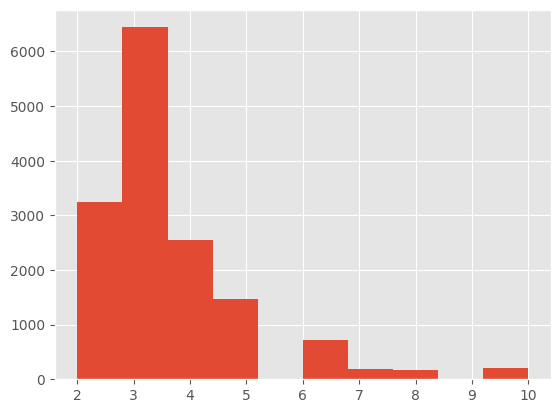

In [21]:
plt.hist(data_baru['time_spend_company'])
plt.show()

(array([1335.,  498.,  477., 1778., 1471., 1775., 1768., 2115., 1998.,
        1784.]),
 array([0.09 , 0.181, 0.272, 0.363, 0.454, 0.545, 0.636, 0.727, 0.818,
        0.909, 1.   ]),
 <BarContainer object of 10 artists>)

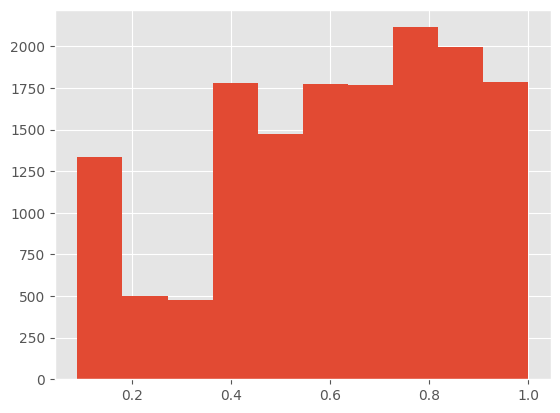

In [26]:
plt.hist(data_baru['satisfaction_level'])

In [30]:
x = data_baru['time_spend_company']
x.head()

0    3
1    6
2    4
3    5
4    3
Name: time_spend_company, dtype: int64

#### Mean Median

In [29]:
print('rata-rata: ',x.mean())
print('median: ',x.median())
print('mode',x.mode()[0])
print('q1',x.quantile(0.25))
print('q3',x.quantile(0.75))
print('percentile 95',x.quantile(0.95))
print('percentile 99',x.quantile(0.99))

rata-rata:  3.498233215547703
median:  3.0
mode 3
q1 3.0
q3 4.0
percentile 95 6.0
percentile 99 10.0


#### Modus

In [ ]:
x.mode()[0]

3

#### Percentile

In [ ]:
data['time_spend_company'].quantile(0.9)

5.0

In [ ]:
np.quantile(data['time_spend_company'],0.9)

5.0

In [ ]:
np.percentile(data['time_spend_company'],90)

5.0

#### Quartile

#### Q1

In [ ]:
data['time_spend_company'].quantile(0.25)

3.0

#### Q2

In [ ]:
data['time_spend_company'].quantile(0.5)

3.0

#### Q3

In [ ]:
data['time_spend_company'].quantile(0.75)

4.0

#### Measure of Spread

#### Variance

In [ ]:
x.var()

2.1319978117222864

#### Standard Deviation

In [ ]:
#cara 1
np.sqrt(x.var())

1.4601362305354546

In [ ]:
# cara 2
x.std()

1.4601362305354546

#### InterQuartileRange (IQR)

In [ ]:
print('Inter Quartile Range (IQR):',x.quantile(0.75)-x.quantile(0.25))

Inter Quartile Range (IQR): 1.0


#### Range

In [ ]:
print('Range:',x.max()-x.min())

Range: 8


# Vertical Boxplot

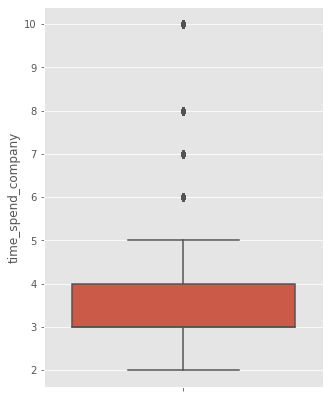

In [ ]:
plt.figure(figsize = (5,7))
sns.boxplot(y='time_spend_company',data = data)
plt.show()

# Horizontal Boxplot

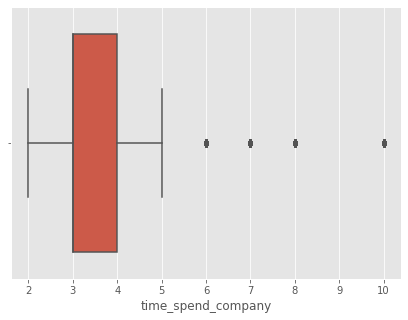

In [ ]:
plt.figure(figsize = (7,5))
sns.boxplot(x='time_spend_company',data = data)
plt.show()

### Additional Code

In [ ]:
data.groupby(['left'])['time_spend_company'].describe()

,count,mean,std,min,25%,50%,75%,max
left,,,,,,,,
0,11428.0,3.380032,1.562348,2.0,2.0,3.0,4.0,10.0
1,3571.0,3.876505,0.977698,2.0,3.0,4.0,5.0,6.0
